(computacion)=
# La computación

Hoy en día cada vez está más extendida la idea de que la computación cuántica ofrece herramientas mucho más potentes que la computación tradicional

Pero, ¿qué crear? ¿Qué es un programa cuántico? De hecho, ¿qué es un ordenador cuántico?

Estas preguntas pueden responderse haciendo comparaciones con los ordenadores digitales estándar. Por desgracia, la mayoría de la gente tampoco entiende realmente cómo funcionan los ordenadores digitales. En este artículo veremos los principios básicos de estos dispositivos. Para facilitarnos la transición a la computación cuántica más adelante, lo haremos utilizando las mismas herramientas que usaremos para la cuántica.


A continuación se muestra algo de código Python que tendremos que ejecutar si queremos utilizar el código de esta página y en general si queremos trabar con qiskit:

In [30]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

##  Dividiendo la información en bits.  <a id="bits"></a>

Lo primero que debemos conocer es la idea de los bits. Son el alfabeto más sencillo del mundo. Con sólo dos caracteres, 0 y 1, podemos representar cualquier información.




One example is numbers. You are probably used to representing a number through a string of the ten digits 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. In this string of digits, each digit represents how many times the number contains a certain power of ten. For example, when we write 9213, we mean

Un ejemplo son los números. Probablemente estés acostumbrado a representar un número mediante una cadena de los diez dígitos 0, 1, 2, 3, 4, 5, 6, 7, 8 y 9. En esta cadena de dígitos, cada dígito representa cuántas veces un número contiene una determinada potencia de diez. En esta cadena de dígitos, cada dígito representa cuántas veces el número contiene una determinada potencia de diez. Por ejemplo, cuando escribimos 9213, queremos decir

$$ 9000 + 200 + 10 + 3 $$



o, expresado de forma que destaque las potencias de diez



$$ (9\times10^3) + (2\times10^2) + (1\times10^1) + (3\times10^0) $$

Aunque solemos utilizar este sistema basándonos en el número 10, podemos utilizarlo con la misma facilidad basándonos en cualquier otro número. El sistema numérico binario, por ejemplo, se basa en el número dos. Esto significa utilizar los dos caracteres 0 y 1 para expresar los números como múltiplos de potencias de dos. Por ejemplo, 9213 se convierte en 10001111111101, ya que


$$ 9213  = (1 \times 2^{13}) + (0 \times 2^{12}) + (0 \times 2^{11})+ (0 \times 2^{10}) +(1 \times 2^9) + (1 \times 2^8) + (1 \times 2^7) \\\\ \,\,\,   + (1 \times 2^6) + (1 \times 2^5) + (1 \times 2^4) + (1 \times 2^3) + (1 \times 2^2) + (0 \times 2^1) + (1 \times 2^0) $$

En este caso estamos expresando los números como múltiplos de 2, 4, 8, 16, 32, etc. en lugar de 10, 100, 1000, etc.


```{index} qiskit_textbook
```

A continuación se muestra un ejemplo que se puede encontrar en [qiskit_textbook](qiskit_textbook) podemos encontrar una aplicación que nos ayuda a entender todo esto

In [31]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

Estas cadenas de bits, conocidas como cadenas binarias, pueden utilizarse para representar algo más que números. Por ejemplo, existe una forma de representar cualquier texto utilizando bits. Para cualquier letra, número o signo de puntuación que quieras utilizar, puedes encontrar una cadena correspondiente de ocho bits como máximo utilizando 
<a href ="https://www.ibm.com/support/knowledgecenter/en/ssw_aix_72/com.ibm.aix.networkcomm/conversion_table.htm" target="_blank"> esta tabla</a>.


Así es como se representa toda la información en los ordenadores. Ya sean números, letras, imágenes o sonidos, todo existe en forma de cadenas binarias.

Al igual que nuestros ordenadores digitales estándar, los ordenadores cuánticos se basan en esta misma idea básica. La principal diferencia es que utilizan *qubits*, una extensión del bit a la mecánica cuántica. En el resto de este libro exploraremos qué son los qubits, qué pueden hacer y cómo lo hacen. En esta sección, sin embargo, no vamos a hablar de cuántica en absoluto. Por tanto, utilizaremos los qubits como si fueran bits de la computación tradicional.



### Ejercicios

1. Piensa en un número e intenta escribirlo en binario.

2. Si tienes $n$ bits, ¿en cuántos estados diferentes pueden estar?

## 2. Computación  como un diagrama <a id="diagram"></a>

Tanto si usamos qubits como bits, necesitamos manipularlos para convertir las entradas que tenemos en las salidas que necesitamos. Para los programas más simples, con muy pocos bits, es útil representar este proceso en un diagrama conocido como *diagrama de circuito*. Estos diagramas tienen las entradas a la izquierda, las salidas a la derecha y las operaciones representadas por símbolos arcanos en medio. Estas operaciones se denominan "puertas", sobre todo por razones históricas.

A continuación se muestra un ejemplo de circuito para ordenadores estándar basados en bits. No se espera que entiendas lo que hace. Simplemente debería darte una idea de cómo son estos circuitos.


![image1](images/circuito_clasico.PNG)


Para los ordenadores cuánticos, utilizamos la misma idea básica pero tenemos diferentes convenciones sobre cómo representar las entradas, las salidas y los símbolos utilizados para las operaciones. He aquí el circuito cuántico que representa el mismo proceso anterior.

![image2](images/circuito_cuantico.PNG)

En el resto de esta sección, explicaremos cómo construir circuitos. Al final de este capítulo, sabrás cómo crear el circuito anterior, qué hace y por qué es útil.

## Primer circuito cuántico <a id="first-circuit"></a>

En un circuito, normalmente tenemos que realizar tres tareas: Primero, codificar la entrada, después realizar algún cálculo y, por último, extraer una salida. Para tu primer circuito cuántico, nos centraremos en la última de estas tareas. Empezaremos creando un circuito con ocho qubits y ocho salidas.

In [32]:
qc_output = QuantumCircuit(8)

Este circuito, que hemos llamado `qc_output`, es creado por Qiskit usando `QuantumCircuit`. El `QuantumCircuit` toma como argumento el número de qubits del circuito cuántico. 

La extracción de salidas en un circuito cuántico se realiza mediante una operación llamada `measure_all()`. Cada medida le dice a un qubit específico que dé una salida a un bit de salida específico. El comando `qc_output.measure_all()` añade una medida a cada qubit en el circuito `qc_output`, y también añade algunos bits clásicos para escribir la salida.


In [33]:
qc_output.measure_all()

Ahora que nuestro circuito tiene algo, echémosle un vistazo.

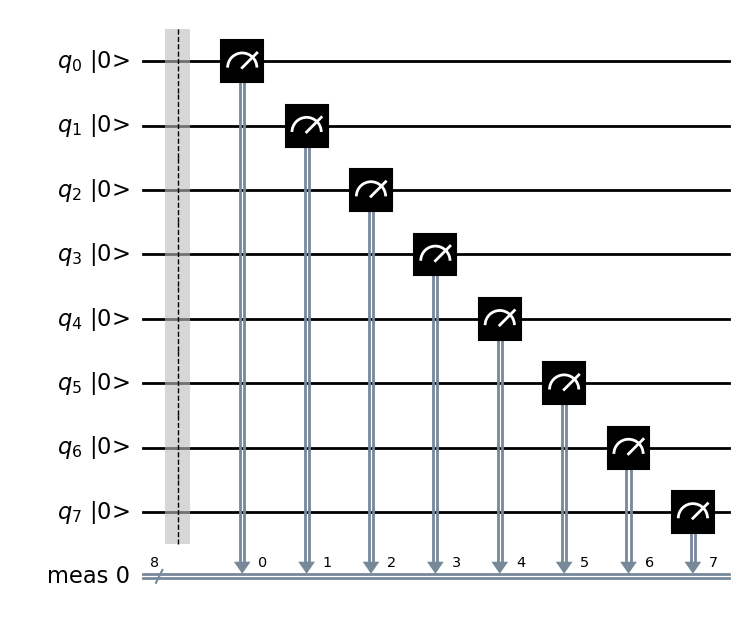

In [34]:
qc_output.draw(initial_state=True, output='mpl') 

Los qubits siempre se inicializan para dar la salida ```0``. Como no hacemos nada a nuestros qubits en el circuito anterior, éste es exactamente el resultado que obtendremos cuando los midamos. Podemos comprobarlo ejecutando el circuito muchas veces y representando los resultados en un histograma. Veremos que el resultado es siempre ```00000000``: un ```0`` de cada qubit.



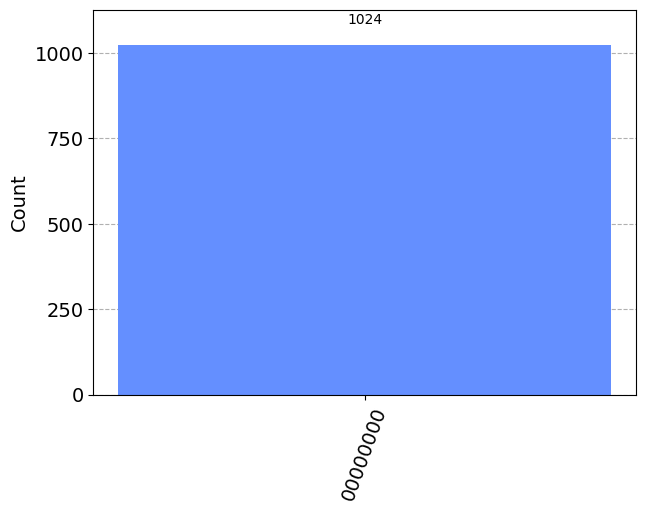

In [35]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

La razón para ejecutar muchas veces y mostrar el resultado como un histograma es porque los ordenadores cuánticos pueden tener cierta aleatoriedad en sus resultados. En este caso, como no estamos haciendo nada cuántico, obtenemos sólo el resultado 00000000 con certeza.

Tenga en cuenta que este resultado procede de un **simulador cuántico**, que es un ordenador estándar que calcula lo que haría un ordenador cuántico ideal. Las simulaciones sólo son posibles para números pequeños de qubits (~30 qubits), pero no dejan de ser una herramienta muy útil a la hora de diseñar tus primeros circuitos cuánticos. Para ejecutarlo en un dispositivo real sólo tienes que sustituir "Aer.get_backend('aer_simulator')" por el objeto backend del dispositivo que quieras utilizar. 

 

## Ejemplo: Creando un circuito para sumar <a id="adder"></a>
### Codificando un input <a id="encoding"></a>

Veamos ahora cómo codificar una cadena binaria diferente como entrada. Para ello, necesitamos lo que se conoce como puerta NOT (Lo que hace es cambiar el estado $|0\rangle$ por $|1\rangle$ y al revés). Es la operación más básica que se puede hacer en un ordenador. En el caso de los qubits, es una operación llamada "X" la que hace el trabajo del NOT.

A continuación creamos un nuevo circuito dedicado al trabajo de codificación y lo llamamos `qc_encode`. Por ahora, sólo especificamos el número de qubits.


In [36]:
qc_encode = QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

Observar que cambiando ligeramente la instrucción *draw()* la estética del diagrama mejora sustancialmente

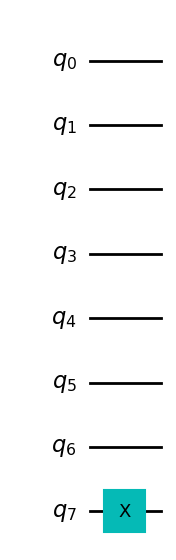

In [37]:
qc_encode.draw(output='mpl')

La extracción de resultados se puede hacer utilizando el circuito que tenemos de antes: `qc_output`.

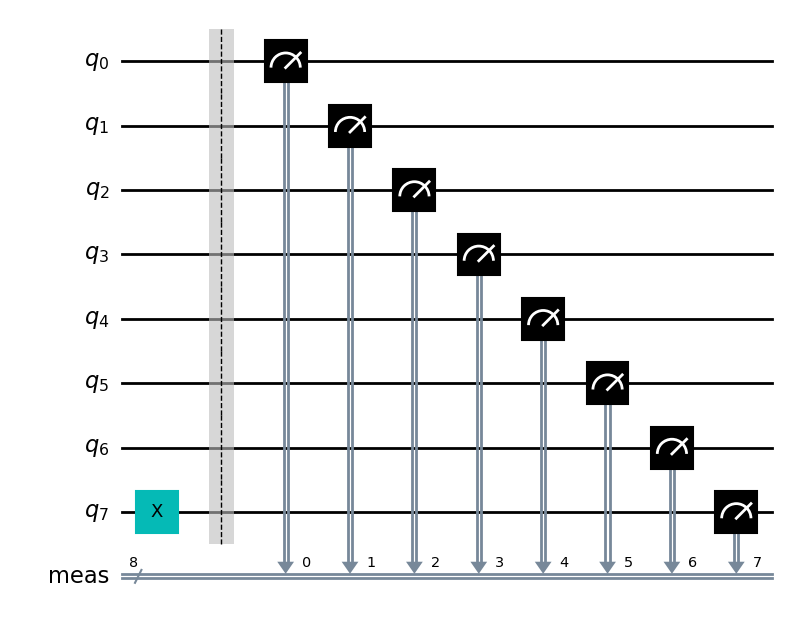

In [38]:
qc_encode.measure_all()
qc_encode.draw(output='mpl')

Ahora podemos ejecutar el circuito combinado y observar los resultados.

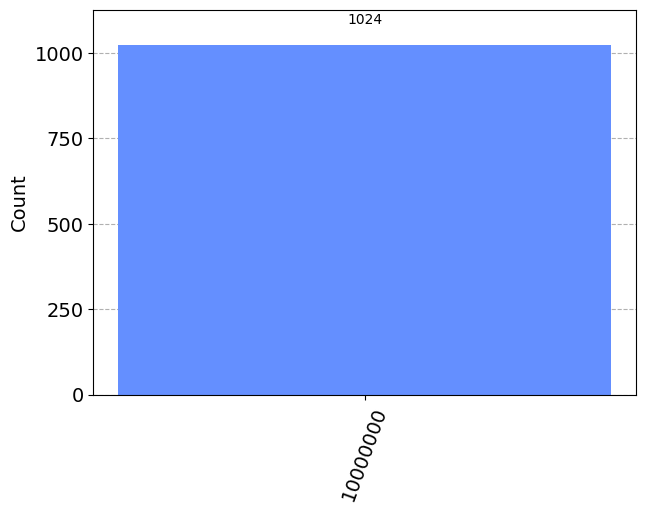

In [39]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

Ahora nuestro ordenador muestra la cadena 10000000.

El bit que hemos volteado, que proviene del qubit 7, se encuentra en el extremo izquierdo de la cadena. Esto se debe a que Qiskit numera los bits de una cadena de derecha a izquierda. Algunos prefieren numerar sus bits al revés, pero el sistema de Qiskit tiene sus ventajas cuando usamos los bits para representar números. En concreto, significa que el qubit 7 nos está diciendo cuántos  $2^7$ s tenemos en nuestro número. Así que al invertir este bit, hemos escrito el número 128 en nuestro sencillo ordenador de 8 bits.

Ahora intenta escribir otro número para ti. Por ejemplo, tu edad. Utiliza un motor de búsqueda para averiguar qué aspecto tiene el número en binario (si incluye un "0b", ignóralo) y, a continuación, añade algunos 0 a la izquierda si tienes menos de 128 años.


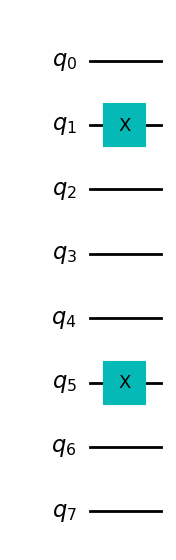

In [40]:
qc_encode = QuantumCircuit(8)
qc_encode.x(1)
qc_encode.x(5)

qc_encode.draw(output='mpl')

Ahora ya sabemos cómo codificar la información en un ordenador. El siguiente paso es procesarla: Tomar una entrada que hemos codificado y convertirla en una salida que necesitamos.

### Recordando cómo se suma. <a id="remembering-add"></a>

Para ver cómo se convierten las entradas en salidas, necesitamos un problema que resolver. Hagamos un poco de matemáticas básicas. En la escuela primaria, habrás aprendido a resolver grandes problemas matemáticos y a dividirlos en partes manejables. Por ejemplo, ¿cómo resolverías lo siguiente?

```
   9213
+  1854
=  ????
```

Una forma es hacerlo dígito a dígito, de derecha a izquierda. Empezamos con 3+4
```
   9213
+  1854
=  ???7
```

y después 1+5
```
   9213
+  1854
=  ??67
```

y después tendremos 2+8=10. Como se trata de una respuesta de dos dígitos, tenemos que pasar el uno a la siguiente columna.

```
   9213
+  1854
=  ?067
   ¹ 
```

Finalmente tenemos 9+1+1=11, y nuestra respuesta sería

```
   9213
+  1854
= 11067
   ¹ 
```

Puede que sólo sea una simple suma, pero demuestra los principios que subyacen a todos los algoritmos. Tanto si el algoritmo está diseñado para resolver problemas matemáticos como para procesar texto o imágenes, siempre descomponemos las grandes tareas en pasos pequeños y sencillos.

Para que funcionen en un ordenador, los algoritmos deben compilarse en los pasos más pequeños y sencillos posibles. Para ver cómo son, repitamos el problema de la suma anterior, pero en binario.


```
   10001111111101
+  00011100111110
                                    
=  ??????????????
```

Fíjate en que el segundo número tiene un montón de 0s extra a la izquierda. Esto sólo sirve para que las dos cadenas tengan la misma longitud.

Nuestra primera tarea es hacer el 1+0 para la columna de la derecha. En binario, como en cualquier sistema numérico, la respuesta es 1. Obtenemos el mismo resultado para el 0+1 de la segunda columna.

```
   10001111111101
+  00011100111110

=  ????????????11 
```

A continuación, tenemos 1+1. Como seguramente sabrás, 1+1=2. En binario, el número 2 se escribe ```10```, por lo que requiere dos bits. Esto significa que tenemos que llevar el 1, igual que haríamos con el número 10 en decimal.

```
   10001111111101
+  00011100111110
=  ???????????011 
             ¹ 
```
La siguiente columna requiere que calculemos ```1+1+1``. Esto significa sumar tres números, así que las cosas se están complicando para nuestro ordenador. Pero podemos reducirlo a operaciones más sencillas y hacerlo de forma que sólo tengamos que sumar dos bits. Para ello, podemos empezar con sólo los dos primeros 1s.

The next column now requires us to calculate ```1+1+1```. This means adding three numbers together, so things are getting complicated for our computer. But we can still compile it down to simpler operations, and do it in a way that only ever requires us to add two bits together. For this, we can start with just the first two 1s.

```
   1
+  1
= 10
```

Ahora tenemos que añadir este 10 a la 1 final, que se puede hacer utilizando nuestro método habitual de ir a través de las columnas.



```
  10
+ 01
= 11
```

La respuesta final es ```11``` (en decimal sería  3).

Ahora podemos volver al resto del problema. Con la respuesta de 11, tenemos otro bit de acarreo.

```
   10001111111101
+  00011100111110
=  ??????????1011
            ¹¹
```

Así que ahora tenemos que hacer otro 1+1+1. Pero ya sabemos cómo hacerlo, así que no es gran cosa.

De hecho, todo lo que queda hasta ahora es algo que ya sabemos hacer. Esto se debe a que, si lo descomponemos todo en sumas de sólo dos bits, sólo hay cuatro cosas posibles que necesitaremos calcular. Éstas son las cuatro sumas básicas (escribiremos todas las respuestas con dos bits para ser coherentes).

```
0+0 = 00 (in decimal, this is 0+0=0)
0+1 = 01 (in decimal, this is 0+1=1)
1+0 = 01 (in decimal, this is 1+0=1)
1+1 = 10 (in decimal, this is 1+1=2)
```

Este procedimiento se denomina *half adder*. Si nuestro ordenador puede implementar esto, y si puede encadenar muchos de estos números, se puede entonces sumar cualquier cosa.

### Sumando con Qiskit <a id="adding-qiskit"></a>

Vamos a crear nuestro propio sumador utilizando Qiskit. Esto incluirá una parte del circuito que codifica la entrada, una parte que ejecuta el algoritmo, y una parte que extrae el resultado. La primera parte tendrá que cambiarse cada vez que queramos usar una nueva entrada, pero el resto permanecerá siempre igual.

![half adder implemented on a quantum circuit](images/half-adder.PNG)


Los dos bits que queremos sumar están codificados en los qubits 0 y 1. El ejemplo anterior codifica un 1 en estos dos qubits, por lo que busca la solución de 1+1. El resultado será una cadena de dos bits, que leeremos de los qubits 2 y 3 y almacenaremos en los bits clásicos 0 y 1, respectivamente. Sólo queda rellenar el programa real, que vive en el espacio en blanco en la zona del centro.

Las líneas verticales y discontinuas de la imagen son sólo para distinguir las diferentes partes del circuito (aunque también pueden tener usos más interesantes). Se hacen utilizando el comando *barrier*.

Los componentes básicos de los ordenadores son las puertas lógicas. Ya hemos utilizado la puerta NOT, pero no es suficiente para hacer nuestra *half adder*. Sólo podríamos utilizarla para escribir manualmente las respuestas. Como queremos que el ordenador haga el cálculo por nosotros, necesitaremos puertas más potentes.

Para ver lo que necesitamos, echemos otro vistazo a lo que tiene que hacer nuestro *half adder* (tabla de la verdad).



```
0+0 = 00
0+1 = 01
1+0 = 01
1+1 = 10
```

El bit de más a la derecha en estas cuatro respuestas está completamente determinado por si los dos bits que estamos sumando son iguales o diferentes. Así, para 0+0 y 1+1, donde los dos bits son iguales, el bit de la derecha de la respuesta es 0. Para 0+1 y 1+0, donde estamos sumando diferentes valores de bits, el bit más a la derecha es 1.

Para que esta parte de nuestra solución sea correcta, necesitamos algo que pueda averiguar si dos bits son diferentes o no. Tradicionalmente, en el estudio de la computación digital, esto se llama una puerta XOR.



| Input 1 | Input 2 | XOR Output |
|:-------:|:-------:|:------:|
| 0       | 0       | 0      |
| 0       | 1       | 1      |
| 1       | 0       | 1      |
| 1       | 1       | 0      |

En los ordenadores cuánticos, el trabajo de la puerta XOR lo realiza la puerta controlada-NOT. Como es un nombre bastante largo, solemos llamarla simplemente CNOT. En Qiskit su nombre es cx, que es aún más corto. En los diagramas de circuito, se dibuja como en la imagen de abajo.


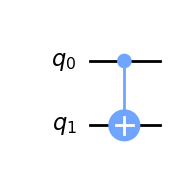

In [41]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw(output='mpl')

Este tipo de puertas lógicas se aplica a un par de qubits. Uno actúa como qubit de control (es el que tiene el puntito). El otro actúa como *qubit objetivo* (con el círculo grande que tiene un signo '''+''' dentro).

Hay varias maneras de explicar el efecto de la CNOT. Una es decir que mira sus dos bits de entrada para ver si son iguales o diferentes. A continuación, sobrescribe el qubit de destino con la respuesta. El objetivo se convierte en 0 si son iguales, y en 1 si son diferentes.



<img src="images/cnot_xor.PNG">

Otra forma de explicar la CNOT es decir que hace un NOT sobre el objetivo si el control es 1, y no hace nada en caso contrario. Esta explicación es tan válida como la anterior (de hecho, es la que da nombre a la puerta).


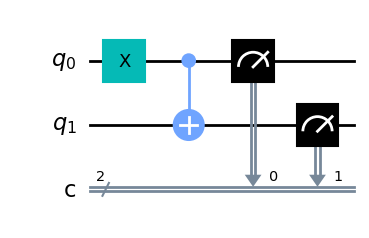

In [42]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw(output='mpl')

Si ejecutas este circuito, verás que la salida es 11. Podemos pensar que esto ocurre por cualquiera de las siguientes razones.


* La puerta CNOT calcula si los valores de entrada son diferentes y encuentra que lo son, lo que significa que quiere dar como salida 1. Lo hace escribiendo sobre el estado del qubit 1 (que, recordemos, está a la izquierda de la cadena de bits), convirtiendo 01 en 11.

* La puerta CNOT ve que el qubit 0 está en estado 1, y aplica un NOT al qubit 1. Esto invierte el 0 del qubit 1 en un 1. Esto invierte el 0 del qubit 1 en un 1, y así convierte 01 en 11.

A continuación se muestra una tabla con todas las entradas posibles y las salidas correspondientes de la puerta CNOT:

| Input (q1 q0) | Output (q1 q0) |
|:-------------:|:--------------:|
| 00            | 00             |
| 01            | 11             |
| 10            | 10             |
| 11            | 01             |

Para nuestro half adder, no queremos sobrescribir una de nuestras entradas. En su lugar, queremos escribir el resultado en un par diferente de qubits. Para ello, podemos utilizar dos CNOT.

Veamos a continuación como construimos este circuito

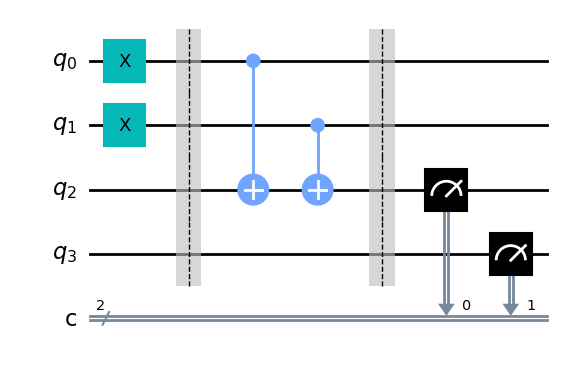

In [43]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw(output='mpl')

Ahora estamos a medio camino de tener una  sumadora half addr completamente operativa. Sólo nos queda el otro bit de la salida: el que vivirá en el qubit 3.

Si miras de nuevo las cuatro sumas posibles, verás que sólo hay un caso en el que es 1 en vez de 0: 1+1=10. Sólo ocurre cuando los dos bits que estamos sumando son 1.

Si miras de nuevo las cuatro sumas posibles, verás que sólo hay un caso en el que es 1 en vez de 0: 1+1=10. Sólo ocurre cuando los dos bits que estamos sumando son 1.

Para calcular esta parte de la salida, podemos hacer que nuestro ordenador mire si ambas entradas son 1. Si lo son, y sólo si lo son, tenemos que hacer una puerta NOT en el qubit 3. Eso lo cambiará al valor requerido de 1 para este caso. Eso le dará la vuelta al valor requerido de 1 sólo para este caso, dándonos la salida que necesitamos.

Para ello, necesitamos una nueva puerta: como una CNOT, pero controlada por dos qubits en lugar de sólo uno. Ésta realizará un NOT en el qubit objetivo sólo cuando ambos controles estén en estado 1. Esta nueva puerta se llama *Toffoli*. Para los que estéis familiarizados con las puertas lógicas booleanas, se trata básicamente de una puerta AND.



En qiskit la puerta de Toffoli está representada por 'ccx' .

La implementamos en el código siguiente

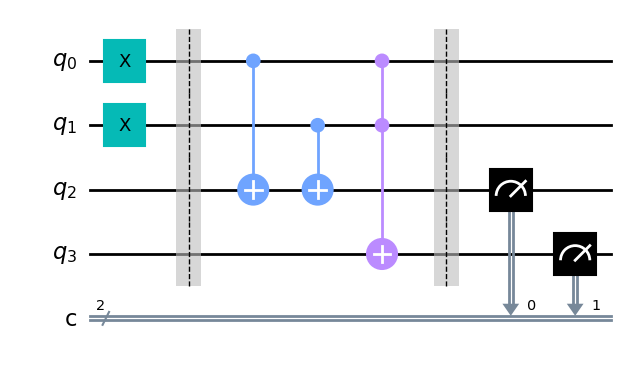

In [44]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw(output='mpl')

En este ejemplo, estamos calculando 1+1, porque los dos bits de entrada son ambos 1. Veamos lo que obtenemos.

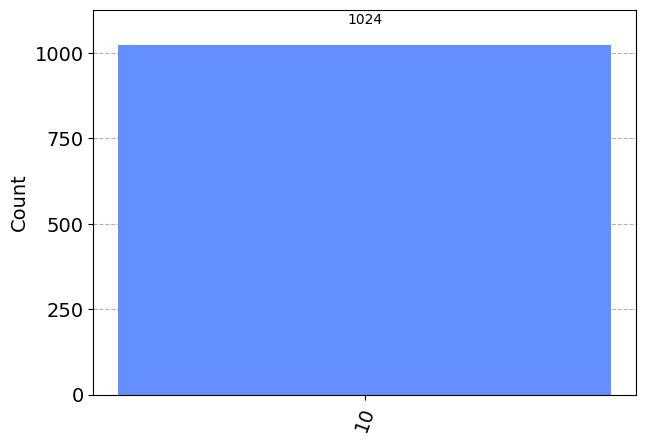

In [45]:
#qobj = assemble(qc_ha)
#counts = sim.run(qobj).result().get_counts()
counts = sim.run(qc_ha).result().get_counts()
plot_histogram(counts)

El resultado es 10, que es la representación binaria del número 2. Hemos construido un ordenador que puede resolver el famoso problema matemático de ¡1+1!

Ahora puedes probarlo con las otras tres entradas posibles y demostrar que nuestro algoritmo también da los resultados correctos para ellas.

Este half adder contiene todo lo necesario para sumar. Con las puertas NOT, CNOT y Toffoli, podemos crear programas que sumen cualquier conjunto de números de cualquier tamaño.

Estas tres puertas bastan también para hacer todo lo demás en informática. De hecho, incluso podemos prescindir de la CNOT. Además, la puerta NOT sólo es realmente necesaria para crear bits con valor 1. La puerta Toffoli es esencialmente el átomo de las matemáticas. Es el elemento más simple, a partir del cual se puede compilar cualquier otra técnica de resolución de problemas.

In [46]:
import qiskit.tools.jupyter
%qiskit_version_table